In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/train.csv")
df.shape

(404290, 6)

## EDA

In [3]:
df.sample(3)

,id,qid1,qid2,question1,question2,is_duplicate
297702,297702,182480,364654,What is it like to fly with Ryanair?,What is it like flying on Ryanair?,1
272400,272400,390655,333210,What is the best online web builder for free?,What is the best online website builder to cre...,1
166687,166687,258585,258586,Was George W. Bush a better presidential candi...,Is Donald Trump just a bigger George W. Bush?,0


In [16]:
# Check 5 random pairs
import random
random_idx = random.choices(df.index, k=5)
for idx in random_idx:
    print(f"Question 1: \n {df.question1.iloc[idx]}")
    print(f"Question 2: \n {df.question2.iloc[idx]}")
    print(f"Duplicate ? -> {'Yes' if df.is_duplicate.iloc[idx] == 1 else 'No'}")
    print("---------------------------")

Question 1: 
 What has been the most uncomfortable experience in your life?
Question 2: 
 What has been the most horrifying experience of your life?
Duplicate ? -> No
---------------------------
Question 1: 
 Why does this guy seem to be losing interest?
Question 2: 
 Why does a guy lose interest quickly?
Duplicate ? -> No
---------------------------
Question 1: 
 What did Dhoni step down as ODI and T20 captain so quietly?
Question 2: 
 Why did MS Dhoni step down from the captaincy of limited overs?
Duplicate ? -> Yes
---------------------------
Question 1: 
 Which are the best online courses on digital marketing in India?
Question 2: 
 Will digital marketing a good course to learn?
Duplicate ? -> Yes
---------------------------
Question 1: 
 What is a frequency?
Question 2: 
 What is frequency?
Duplicate ? -> Yes
---------------------------


In [17]:
# dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [22]:
# missing value
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [23]:
# drop rows with missing values
df.dropna(inplace=True)
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [24]:
# duplicate rows
df.duplicated().sum()

0

0    255024
1    149263
Name: is_duplicate, dtype: int64
Percentage
0    63.079941
1    36.920059
Name: is_duplicate, dtype: float64


<Axes: >

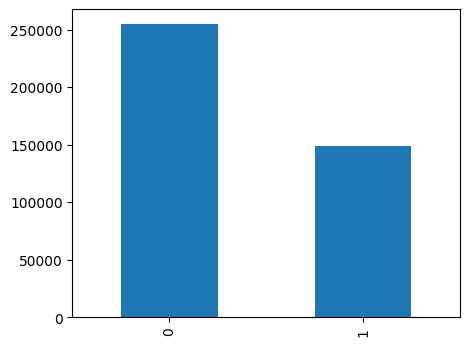

In [27]:
# Distribution of duplicate and non-duplicate questions

print(df["is_duplicate"].value_counts())
print("Percentage")
print((df["is_duplicate"].value_counts()/df["is_duplicate"].count())*100)
plt.figure(figsize=(5,4))
df["is_duplicate"].value_counts().plot(kind="bar")

In [30]:
# Repeated questions

qid = pd.Series(df["qid1"].tolist() + df["qid2"].tolist())
print(f"Number of unique questions -> {qid.nunique()}")
x = qid.value_counts()>1
print(f"Number of questions getting repeated -> {x[x].shape[0]}")

Number of unique questions -> 537929
Number of questions getting repeated -> 111778


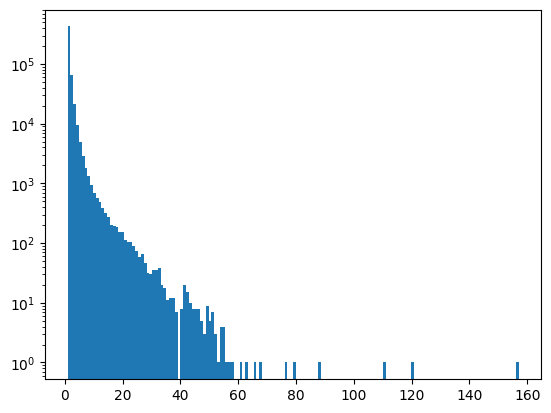

In [34]:
# Repeated questions histogram

plt.hist(qid.value_counts(), bins=160)
plt.yscale("log")
plt.show()

## Creating Baseline model

For baseline model we will use Bag-of-words and below 3 estimators.
- Multinomial Naive Bayes
- Random Forest
- XGBoost

> Due to memory issues, we will use 30000 sample rows from the dataset.

In [50]:
new_df = df.sample(30000)

In [51]:
ques_df = new_df[["question1", "question2"]]
ques_df.head()

,question1,question2
33140,Why is Spotify nott available in India?,Daniel Ek: When an we expect Spotify in India?
350521,Have ever been in a long term interracial/inte...,Have you ever been in an interracial relations...
51280,"I want to install a 3G tower in the Kutch, Guj...",How do you find cell phone number by name?
309939,How do our eyes perceive colors?,How do our eyes and brain process color?
289183,Why do sometimes we get double vision?,Why do I have double vision?


In [52]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df["question1"]) + list(ques_df["question2"])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [53]:
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [54]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
33140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350521,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
51280,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
309939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp_df.values, new_df["is_duplicate"].values, test_size=0.2)

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.748

In [59]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_jobs=-1)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.7335

In [62]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.7083333333333334